In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import torch
from PIL import Image
from transformers import VisionEncoderDecoderModel,ViTFeatureExtractor, AutoTokenizer

# Pretrain model

In [ ]:
# model
model = VisionEncoderDecoderModel.from_pretrained('nlpconnect/vit-gpt2-Image-captioning')

In [ ]:
# create extractor and tokenizer
feature_extractor = ViTFeatureExtractor.from_pretrained('nlpconnect/vit-gpt2-Image-captioning')
tokenizer = AutoTokenizer.from_pretrained('nlpconnect/vit-gpt2-Image-captioning')

In [ ]:
# chacking the CPU
device =torch.device('cuda' if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [ ]:
# give value to lenth and beams
max_length = 16
num_beams = 4

gen_kwargs = {'max_length':max_length, 'num_beams':num_beams}

# Model creation

In [ ]:
def predict_step(image_paths): #  image-paths
    images = []# create empty images key
    for image_path in image_paths:# create image_path
        i_image = Image.open(image_path)# open image_path
        if i_image.mode != 'RGB': # chacking that image is RGB or not
            i_image = i_image.convert(mode = 'RGB') # convert the image into RGB if its not RGB
        images.append(i_image) # append the i_image in images

    pixel_values = feature_extractor(images = images, return_tensors ='pt').pixel_values
    pixel_values = pixel_values.to(device)

   # predict the model
    output_ids = model.generate(pixel_values, **gen_kwargs)
    preds = tokenizer.batch_decode(output_ids, skip_special_tokens = True)
    preds = [pred.strip() for pred in preds]

    return preds # return predicted captions




# Predict the caption using image

In [ ]:
predict_step(['Image1.png'])

['a man kicking a soccer ball on a field']

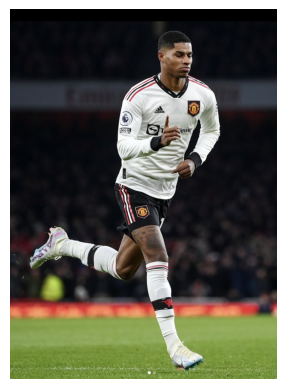

['a man kicking a soccer ball on a field']

In [ ]:
# load the image using PIL

image = Image.open("/content/Image1.png")

# plot the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()
predict_step(["Image1.png"])

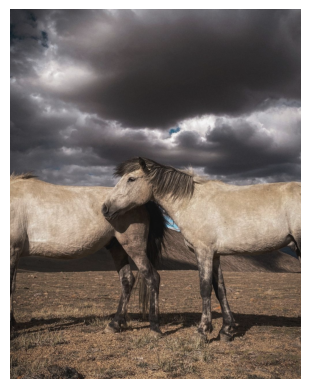

['a woman is standing in a field with a horse']

In [ ]:
# load the image using PIL

image = Image.open("/content/Image2.png")

# plot the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()
predict_step(["Image2.png"])

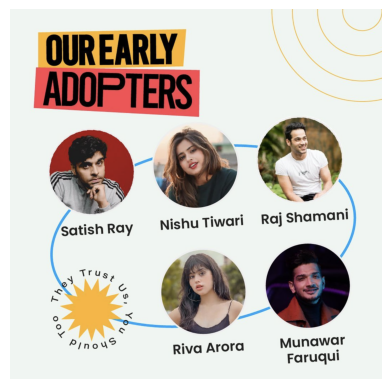

['a collage of photos showing a woman holding a sign']

In [ ]:
# load the image using PIL

image = Image.open("/content/Image3.png")

# plot the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()
predict_step(["Image3.png"])

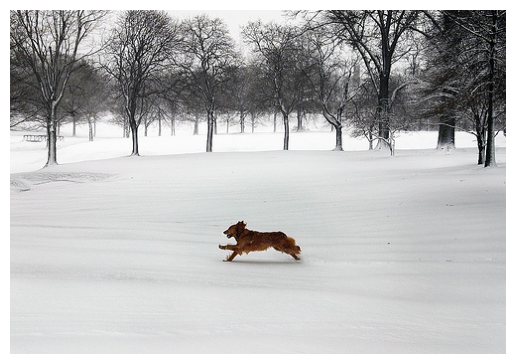

['a dog running across a snow covered field']

In [ ]:
# load the image using PIL

image = Image.open("/content/Image7.jpg")

# plot the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()
predict_step(["Image7.jpg"])

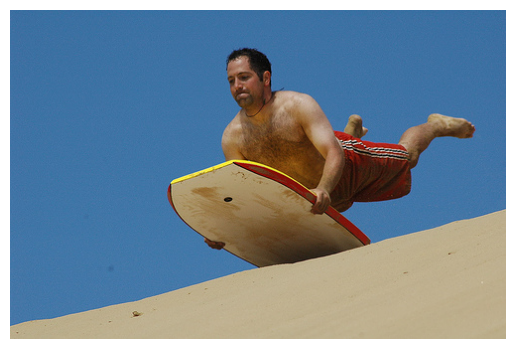

['a man sitting on a surfboard in the sand']

In [ ]:
# load the image using PIL

image = Image.open("/content/Image6.jpg")

# plot the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()
predict_step(["Image6.jpg"])

# Conclusion

#### In thsi task, we created an AI tool that generates caption based on the images. We used the VisionEncoderDecoderModel and ViTFeatureExtractor from the transformers library to extract features from the image and generate captions using the pre-trained 'nlpconnect/vit-gpt2-Image-captioning' model. The final code allows the user to upload a single image and returns a single generated caption for that image 